In [1]:
# ID:sim_nonlinear
import numpy as np  # We use numpy.
np.random.seed(0)  # To make this reproducible.

# Generate fake-data (simulation).
n = 70  # number of observations (increase to 5000 to get a clear correspondence).

# (start)
alpha = 0.9  # Parameter (can be changed).
betas = np.array([0.7]) # Limit to a single beta.
m = len(betas) 
xs = np.random.normal(size=(n, m), scale=2)  # random n x m.

# Linear component (lc).
lc = alpha + np.matmul(xs, betas)  # lc (prev: pred_ys).
prev_ys = lc + np.random.normal(size=n)  # ls + uncertianty (prev: ys)

# Different types of non-linearities (last with uncertainty).
nl1 = np.maximum(0, lc)
nl2 = 1.0 / (1 + np.exp(-lc))
nl3 = np.minimum(1, np.maximum(0, lc))
ys = np.random.binomial(1,  1.0 / (1 + np.exp(-lc)))

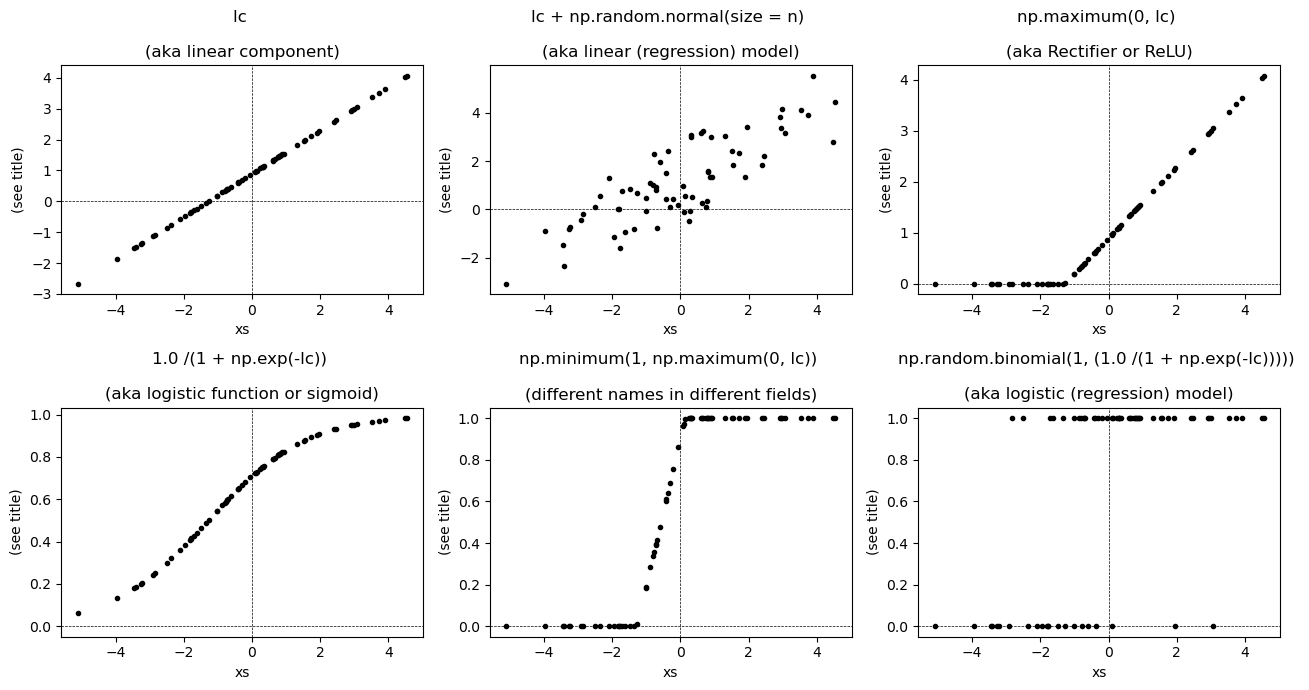

In [2]:
# OUT:sim_nonlinear_out

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
markersize = 3
axs = axs.flatten()

i = 0
axs[i].plot(xs, lc, marker='o', linestyle='', color='black', markersize=markersize)
axs[i].set_xlabel('xs')
axs[i].set_ylabel('(see title)')
axs[i].set_title('lc \n\n(aka linear component)')
axs[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[i].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
i += 1
axs[i].plot(xs, prev_ys, marker='o', linestyle='', color='black', markersize=markersize)
axs[i].set_xlabel('xs')
axs[i].set_ylabel('(see title)')
axs[i].set_title('lc + np.random.normal(size = n) \n\n(aka linear (regression) model)')
axs[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[i].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
i += 1
axs[i].plot(xs, nl1, marker='o', linestyle='', color='black', markersize=markersize)
axs[i].set_xlabel('xs')
axs[i].set_ylabel('(see title)')
axs[i].set_title('np.maximum(0, lc) \n\n(aka Rectifier or ReLU)')
axs[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[i].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
i += 1
axs[i].plot(xs, nl2, marker='o', linestyle='', color='black', markersize=markersize)
axs[i].set_xlabel('xs')
axs[i].set_ylabel('(see title)')
axs[i].set_title('1.0 /(1 + np.exp(-lc)) \n\n(aka logistic function or sigmoid)')
axs[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[i].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
i += 1
axs[i].plot(xs, nl3, marker='o', linestyle='', color='black', markersize=markersize)
axs[i].set_xlabel('xs')
axs[i].set_ylabel('(see title)')
axs[i].set_title('np.minimum(1, np.maximum(0, lc)) \n\n(different names in different fields)')
axs[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[i].axvline(x=0, color='black', linestyle='--', linewidth=0.5)
i += 1
axs[i].plot(xs, ys, marker='o', linestyle='', color='black', markersize=markersize)
axs[i].set_xlabel('xs')
axs[i].set_ylabel('(see title)')
axs[i].set_title('np.random.binomial(1, (1.0 /(1 + np.exp(-lc))))) \n\n(aka logistic (regression) model)')
axs[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[i].axvline(x=0, color='black', linestyle='--', linewidth=0.5)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [3]:
# Go logistic using sklearn.
# ID:nonlinear_sk OUT:nonlinear_sk_out (HIDE)
# Implement the model using the scikit-learn library.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xs, ys)

# Print model summary (recovered parameters):
print("Intercept (alpha): ", model.intercept_)
print("Coefficient (betas): ", model.coef_)

Intercept (alpha):  [1.21233582]
Coefficient (betas):  [[0.82101543]]


In [4]:
# ID:nonlinear_tf OUT:nonlinear_tf_out (HIDE)
import tensorflow as tf # Using tensorflow core (hide).
# Initialize the parameters (here 'variables').
alpha = tf.Variable(0.0, dtype=tf.float32)
betas = tf.Variable(np.repeat(0.0, m), dtype=tf.float32)

xs_tf = tf.constant(xs, dtype=tf.float32) # to tensorflow
ys_tf = tf.constant(ys, dtype=tf.float32) # to tensorflow
# (start)
for i in range(1000): # Minimize 1000 steps.
    with tf.GradientTape() as tp: # Recorde gradients...
        # Define the loss (error) function on our own.
        lc_tf = alpha + tf.linalg.matvec(xs_tf, betas)
        pred_tf = tf.math.sigmoid(lc_tf) # sigmoid (or softmax, for multiple class).
        
        # The error is typically the binary cross-entropy.
        binary_cross_entropy = - tf.reduce_sum(ys_tf * tf.math.log(pred_tf) + (1 - ys_tf) * tf.math.log(1 - pred_tf))
    
    # Minimize deriving error with respect to alpha and beta (end).
    gradients = tp.gradient(binary_cross_entropy, [alpha, betas])
    alpha.assign_sub(0.001 * gradients[0]) # gradient descent.
    betas.assign_sub(0.001 * gradients[1]) # gradient descent.

print("Intercept (alpha): ", alpha.numpy())
print("Coefficient (betas): ", betas.numpy())

2024-02-19 16:07:48.347522: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 16:07:48.347628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 16:07:48.350222: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 16:07:48.359731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 16:07:52.361496: I exter

Intercept (alpha):  1.2445481
Coefficient (betas):  [0.86146253]


In [5]:
# ID:nonlinear_keras OUT:nonlinear_keras_out (hide)
import keras # Using keras API (on top of tensorflow).
import keras.layers as layers

# Single layer and a single output (a linear regression) (start).
model = keras.Sequential([
        layers.Dense(units=1, input_shape=[m], activation='sigmoid')
])
# Optimize using (stochastic) gradient descent optimizer.
# Loss needs to be changed.
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(xs, ys, epochs=1000, verbose=0)
# Print model summary (end)
print("Intercept (alpha): ", model.layers[0].get_weights()[1])
print("Coefficient (betas): ", model.layers[0].get_weights()[0])

2024-02-19 16:08:02.426484: I external/local_xla/xla/service/service.cc:168] XLA service 0x55a9884d2eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-19 16:08:02.426552: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-02-19 16:08:02.443728: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8800
I0000 00:00:1708355282.488950   62080 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Intercept (alpha):  [1.2355958]
Coefficient (betas):  [[0.84700495]]


In [6]:
# ID:nonlinear_stan1 (hide)
# Using a (c++ like) DSL for model specification (hide).
stan_code = """
data {
    int<lower=0> N; // number of observations.
    int<lower=0> M; // number of columns.
    matrix[N, M] xs; // input values (matrix).
    array[N] int<lower=0, upper=1> ys; // output.
}   
parameters { // Parameters we search for.
    real alpha; 
    vector[M] beta;
}
model { // Relationships between data and parameter.
    vector[N] pred;
    pred = alpha + xs * beta;
    ys ~ bernoulli_logit(pred);
}
"""

In [7]:
import stan # Probabilistic programming language (STAN).

import nest_asyncio # (Hide)
nest_asyncio.apply() # To avoid the event loop related error (Hide)
# Run the Hamiltonian Monte Carlo (HMC) sampler to aproximate our 'error' function. Here "error" is a bit different and called the 'posterior' or '(probability) density'.
# Confusing, I know...
data = {'N': n, 'xs': xs, 'ys': ys, 'M': m}
model = stan.build(stan_code, data=data)
posterior = model.sample(num_chains=1, num_samples=4000)

Building...



Building: 29.7s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100% (5000/5000)
Sampling: 100% (5000/5000), done.
Messages received during sampling:
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!


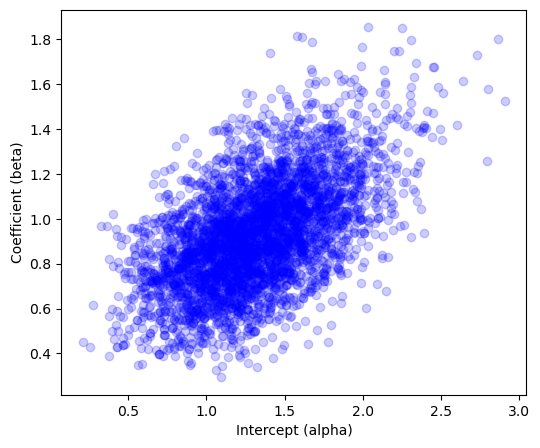

In [8]:
# OUT:nonlinear_stan_out (hide)
# Plotting the posterior samples.
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(posterior['alpha'][0], posterior['beta'][0], marker='o', color='blue', alpha=0.2)

ax.set_xlabel('Intercept (alpha)')
ax.set_ylabel('Coefficient (beta)')

plt.show()